In [15]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [16]:
dataset = load_iris()
X = dataset.data[:100]
y = dataset.target[:100]
df = pd.DataFrame(X,columns=dataset.feature_names)
df['label'] = dataset.target[:100]
df['name'] = np.where(df['label']==0,'setosa','verginica')
y = np.where(y==0,-1,1)
setosa = np.array(df[:50])
verginica = np.array(df[50:100])

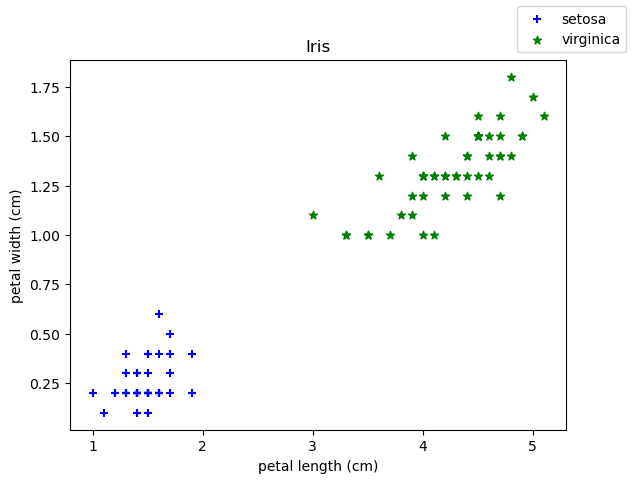

In [17]:
plt.xlabel(dataset.feature_names[2])
plt.ylabel(dataset.feature_names[3])
plt.title('Iris')
plt.scatter(setosa[:,2],setosa[:,3][:50],c='blue',marker='+',label='setosa')
plt.scatter(verginica[:,2],verginica[:,3][:50],c='green',marker='*',label='virginica')
plt.figlegend()
plt.show()

In [18]:
def hinge_loss(ytrue,ypred):
    l = ytrue * ypred
    return np.maximum(0,1-l)

In [19]:
w = np.array([3,2,4,9])
b = 1

# wx + b 
pred = np.dot(X,w.T) + b

# max(0, 1 - y * f(x))
loss = hinge_loss(y,pred.flatten())
loss

array([31.7, 30.1, 29.5, 29.8, 31.6, 36.4, 30.9, 31.6, 28.4, 29.8, 33.4,
       31.4, 28.9, 26.2, 34. , 37.5, 34.8, 32.6, 36.2, 33.6, 33.6, 34.3,
       28.8, 35.2, 32.6, 31.2, 33.8, 32.4, 31.8, 30.7, 30.8, 34.6, 32.7,
       34.3, 30.7, 30. , 32.5, 30.4, 28.2, 31.9, 31.9, 28. , 28.6, 35.8,
       36.1, 30.7, 33.1, 29.6, 33.1, 31. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ])

In [20]:
# L2 square norm (Euclidian Norm)
l2 = np.sum(np.square(w))
l2

110

In [21]:
total_loss = (1/100) * np.sum(loss) + l2
total_loss

125.968

In [22]:
# returns gradient of the loss w.r.t weights: 
def gradient(x,ytrue,ypred,lr,ld):
    if ytrue * ypred >= 1:
        return (w - lr*ld*w),(b+lr*ytrue)
    else:
        t1 = np.subtract(ld*w,ytrue * x)
        t2 = lr * t1

        return w - t2, b + lr*ytrue

In [23]:
epochs = 1000

# learning rate
lr = 0.01

# lambda
ld = 0.1

for i in range(epochs):
    for x_i,y_i in zip(X,y):
        pred = np.dot(x_i,w.T) + b
        gw, gb = gradient(x_i,y_i,pred,lr,ld)
        w = gw
        b = gb
    if i % 100 == 0: 
        pred1 = np.dot(X,w.T) + b
        l2 = np.sum(np.square(w))
        loss = hinge_loss(y,pred1.flatten())
        total_loss = (1/100) * np.sum(loss) + l2
        print(f'Epoch: {i} Loss: {total_loss}')

Epoch: 0 Loss: 78.80100831933358
Epoch: 100 Loss: 1.0049343376209443
Epoch: 200 Loss: 1.0089734883138222
Epoch: 300 Loss: 1.0075474018048092
Epoch: 400 Loss: 1.0054205248925512
Epoch: 500 Loss: 1.009719949332582
Epoch: 600 Loss: 1.008660841726178
Epoch: 700 Loss: 1.0070810843947076
Epoch: 800 Loss: 1.0047251424866284
Epoch: 900 Loss: 1.008681197426373
